   ***Piotr Szyszka***
    
   s95047@pollub.edu.pl
    
   IAD 2.2 LAB 3
    
  
    
*Projekt na zaliczenie przedmiotu* ***Programowanie w języku Python***

***Temat projektu***: *Analiza kursów cen kryptowalut.*

## 1. Opis zbioru danych.

Zebrane dane dotyczą kursów cen (w $) czterech wybranych kryptowalut od 01-01-2020 do 20-06-2022. Są to:

* Ethereum (***ETH***)

* Bitcoin (***BTC***)

* Binancecoin (***BNB***)

* Litecoin (***LTC***)

Dane pochodzą z z [yahoofinance](https://finance.yahoo.com/) i zostały zaimportowane za pomocą biblioteki `yfinance`.




In [58]:
# Biblioteki
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [59]:
# Pobranie danych z yahoofinance
eth = yf.download(tickers = "ETH-USD", start = "2020-01-01", end = "2022-06-20")
btc = yf.download(tickers = "BTC-USD", start = "2020-01-01", end = "2022-06-20")
bnb = yf.download(tickers = "BNB-USD", start = "2020-01-01", end = "2022-06-20")
litecoin = yf.download(tickers = "LTC-USD", start = "2020-01-01", end = "2022-06-20")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:

df = pd.DataFrame({"Ethereum": eth.Close,
                   "Bitcoin": btc.Close,
                   "Binancecoin":bnb.Close,
                   "Litecoin":litecoin.Close})
df.head()

,Ethereum,Bitcoin,Binancecoin,Litecoin
Date,,,,
2019-12-31,129.610855,7193.599121,13.727642,41.340073
2020-01-01,130.802002,7200.174316,13.689083,42.017719
2020-01-02,127.410179,6985.470215,13.027011,39.823013
2020-01-03,134.171707,7344.884277,13.660452,42.415573
2020-01-04,135.069366,7410.656738,13.891512,43.326607


# Trochę ilustracji.

Jak wiadomo ludzie są wzrokowcami, stąd przebieg zmienności notowań najlepiej jest przedstawiać w postaci tabel i wykresów. 


# 2. Podstawowe statystyki opisowe.

In [61]:
df.describe()

,Ethereum,Bitcoin,Binancecoin,Litecoin
count,902.000000,902.000000,902.000000,902.000000
mean,1752.258623,30862.035612,233.387436,117.591574
std,1391.419713,18260.232894,207.920088,68.329343
min,110.605873,4970.788086,9.386050,30.930883
25%,351.378326,10608.167725,22.835897,55.188676
50%,1792.637268,34025.847656,264.347092,110.330795
75%,2940.012085,46261.769531,406.356453,167.417652
max,4812.087402,67566.828125,675.684082,386.450775


# 3. Szeregi rozdzielcze

In [62]:
styles = [dict(selector="caption", props=[("font-size", "120%"),
                                          ("font-weight", "bold")])]

p1 = np.arange(100, 5001, 700)
eth = pd.cut(df["Ethereum"], p1, right = True)
wyn = np.unique(eth, return_counts = True)
szereg = pd.DataFrame({"Przedział": wyn[0],
             "Liczebnosc": wyn[1]})

szereg.style.set_caption('Ethereum').set_table_styles(styles)

,Przedział,Liczebnosc
0,"(100, 800]",369
1,"(800, 1500]",43
2,"(1500, 2200]",130
3,"(2200, 2900]",124
4,"(2900, 3600]",137
5,"(3600, 4300]",73
6,"(4300, 5000]",26


In [63]:
p2 = np.arange(4500, 70600, 6000)
btc = pd.cut(df.Bitcoin, p2, right = True)
w = np.unique(btc, return_counts = True)
szereg = pd.DataFrame({"Przedział": w[0],
             "Liczebnosc": w[1]})
szereg.style.set_caption("Bitcoin").set_table_styles(styles)

,Przedział,Liczebnosc
0,"(4500, 10500]",221
1,"(10500, 16500]",100
2,"(16500, 22500]",37
3,"(22500, 28500]",16
4,"(28500, 34500]",84
5,"(34500, 40500]",120
6,"(40500, 46500]",108
7,"(46500, 52500]",93
8,"(52500, 58500]",70
9,"(58500, 64500]",47


In [64]:
p2 = np.arange(5, 701, 75)
bnb = pd.cut(df.Binancecoin, p2, right = True)
w = np.unique(bnb, return_counts = True)
szereg = pd.DataFrame({"Przedział": w[0],
             "Liczebnosc": w[1]})
szereg.style.set_caption("Binancecoin").set_table_styles(styles)

,Przedział,Liczebnosc
0,"(5, 80]",406
1,"(80, 155]",8
2,"(155, 230]",14
3,"(230, 305]",81
4,"(305, 380]",110
5,"(380, 455]",135
6,"(455, 530]",69
7,"(530, 605]",50
8,"(605, 680]",29


In [65]:
p2 = np.arange(30, 400, 40)
ltc = pd.cut(df.Litecoin, p2, right = True)
w = np.unique(ltc, return_counts = True)
szereg = pd.DataFrame({"Przedział": w[0],
             "Liczebnosc": w[1]})
szereg.style.set_caption("Litecoin").set_table_styles(styles)

,Przedział,Liczebnosc
0,"(30, 70]",335
1,"(70, 110]",114
2,"(110, 150]",171
3,"(150, 190]",155
4,"(190, 230]",78
5,"(230, 270]",25
6,"(270, 310]",14
7,"(310, 350]",5
8,"(350, 390]",5


# 4. Przebieg zmienności notowań

Text(0.5, 0.98, 'Notowania od 2020-01-01 do 2022-06-11')

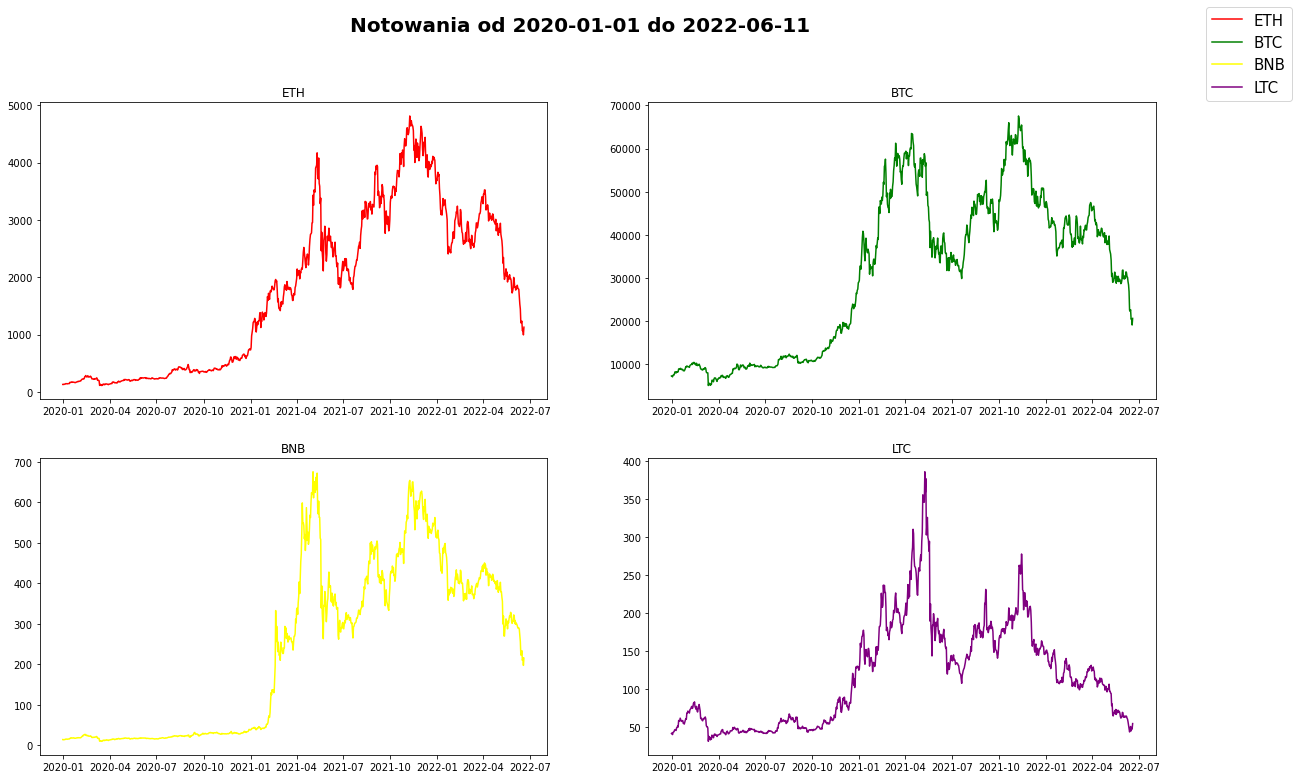

In [66]:
fig = plt.figure(figsize = (20, 12), facecolor = "white")

fig.add_subplot(2, 2, 1)
plt.plot(df.Ethereum, color = "red", label = "ETH")
plt.title("ETH")

fig.add_subplot(2, 2, 2)
plt.plot(df.Bitcoin, color = "green", label = "BTC")
plt.title("BTC")

fig.add_subplot(2, 2, 3)
plt.plot(df.Binancecoin, color = "yellow", label = "BNB")
plt.title("BNB")


fig.add_subplot(2, 2, 4)
plt.plot(df.Litecoin, color = "purple", label = "LTC")
plt.title("LTC")

fig.legend(fontsize = 15)
fig.suptitle("Notowania od 2020-01-01 do 2022-06-11", fontsize = 20, fontweight = "bold")

Zauważmy, że wszystkie kryptowaluty "wystrzeliły" z ceną w kwietniu 2021 

## 5. Histogramy

Text(0.5, 0.98, 'Histogramy kryptowalut')

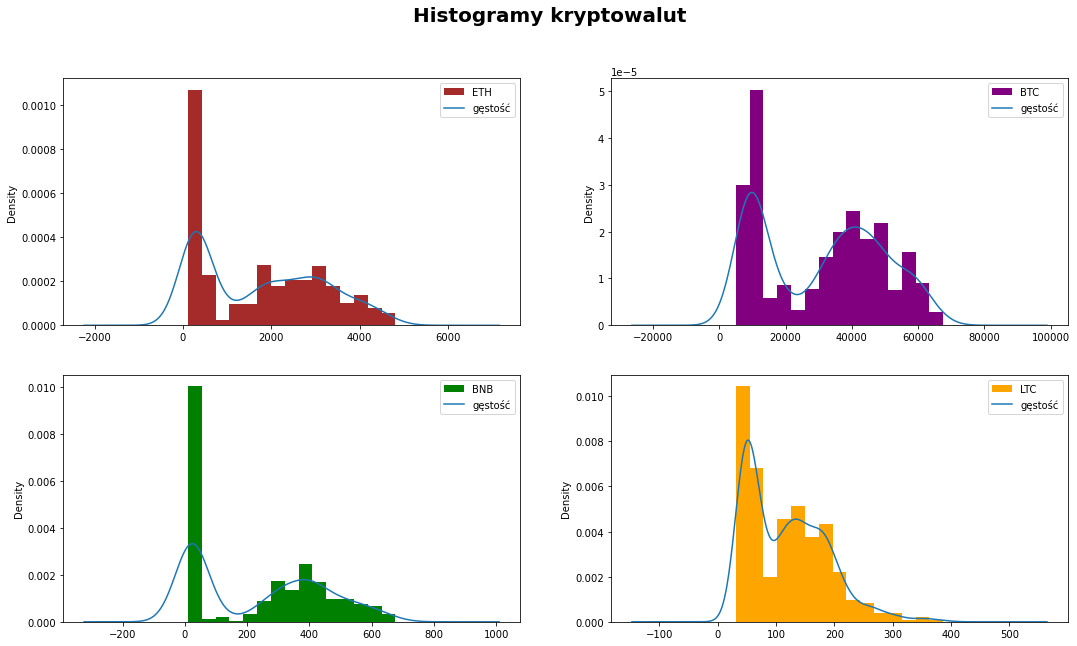

In [67]:
histogramy = plt.figure(figsize = (18, 10))

histogramy.add_subplot(2, 2, 1)
plt.hist(df.Ethereum, bins = 15, color = "brown", label = "ETH", density = True)
df.Ethereum.plot.density(label = "gęstość")
plt.legend()

histogramy.add_subplot(2, 2, 2)
plt.hist(df.Bitcoin, bins = 15, color = "purple", label = "BTC", density = True)
df.Bitcoin.plot.density(label = "gęstość")
plt.legend()

histogramy.add_subplot(2, 2, 3)
plt.hist(df.Binancecoin, bins = 15, color = "green", label = "BNB", density = True)
df.Binancecoin.plot.density(label = "gęstość")
plt.legend()

histogramy.add_subplot(2, 2, 4)
plt.hist(df.Litecoin, bins = 15, color = "orange", label = "LTC", density = True)
df.Litecoin.plot.density(label = "gęstość")
plt.legend()

histogramy.suptitle("Histogramy kryptowalut", fontsize = 20, fontweight = "bold")

## 6. Boxplot


Text(0.5, 0, 'LTC')

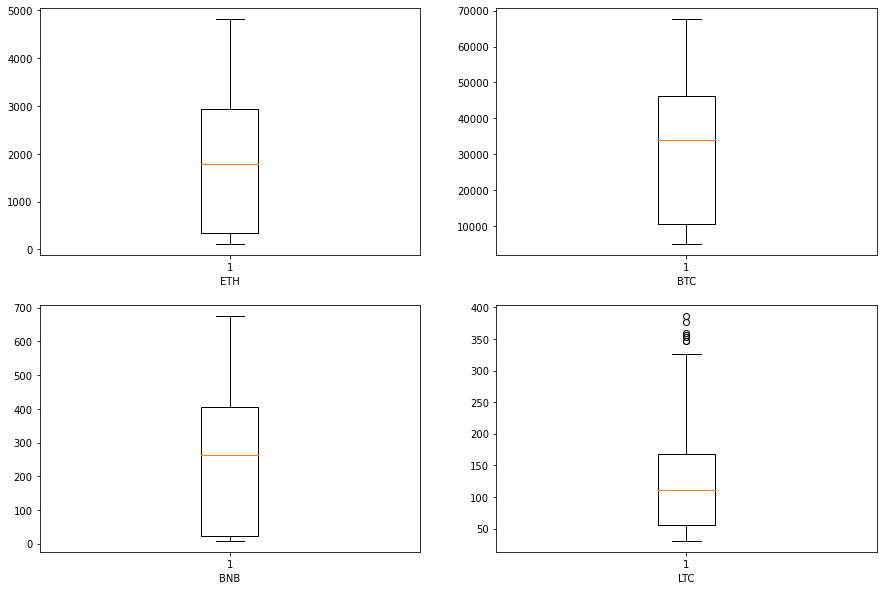

In [68]:
box = plt.figure(figsize = (15, 10))
box.add_subplot(2, 2, 1)
plt.boxplot(df.Ethereum)
plt.xlabel("ETH")

box.add_subplot(2, 2, 2)
plt.boxplot(df.Bitcoin)
plt.xlabel("BTC")

box.add_subplot(2, 2, 3)
plt.boxplot(df.Binancecoin)
plt.xlabel("BNB")

box.add_subplot(2, 2, 4)
plt.boxplot(df.Litecoin)
plt.xlabel("LTC")

# 7. Testy normalności

Do sprawdzania czy rozkład notowań na giełdzie poszczególnyhch walut posłużymy się trzema testami statystycznymi, tj.

* Test ***Shapiro-Wilka***,

* Test ***Kołmogorowa-Smirnova***,

* Test ***Lillieforsa***.

Zacznijmy od zbadania **Ethereum.**

Zanim dobierzemy się do p-value, rzućmy okiem na dystrybuantę.

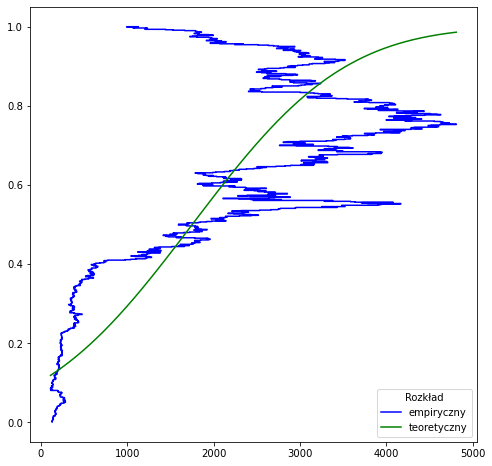

In [69]:
 x = df.Ethereum
 ecdf = np.arange(1, len(x) + 1, 1)/len(x)
 plt.figure(figsize = (8, 8))
 plt.step(x, ecdf, color = "blue", label = "empiryczny")
 teoretyczny = st.norm(loc = np.mean(x), scale = np.std(x))
 t = np.linspace(min(x), max(x), 500)
 plt.plot(t, teoretyczny.cdf(t), color = "green", label = "teoretyczny")

 plt.legend(title = "Rozkład")
 plt.show()


Powyższy wykres pozwala na dosyć odważne i uzasadnione stwierdzenie, że rozkład nie jest normalny, jednak zawsze należy to przetestować.

In [70]:
#Test Shapiro-Wilka
st.shapiro(df.Ethereum)

ShapiroResult(statistic=0.8929465413093567, pvalue=1.559334843247906e-24)

In [71]:
#Test Kołmogorowa-Smirnova

st.kstest(df.Ethereum, teoretyczny.cdf)

KstestResult(statistic=0.1866053040049292, pvalue=5.709673013365442e-28)

In [72]:
#Test Lillieforsa
ssd.lilliefors(df.Ethereum)

(0.18647691028429852, 0.0009999999999998899)

Każdy z testów zwraca bardzo niskie p-value, co wydaje werdykt:

**Rozkład notowań na giełdzie cen Ethereum** ***nie ma rozkładu normalnego.***

Teraz zajmijmy się ***Bitcoinem.***

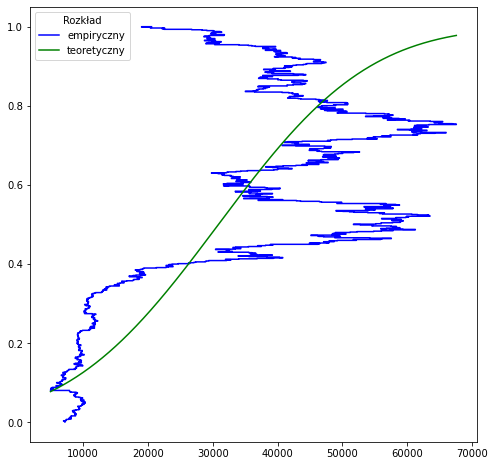

In [73]:
 x = df.Bitcoin
 ecdf = np.arange(1, len(x) + 1, 1)/len(x)
 plt.figure(figsize = (8, 8))
 plt.step(x, ecdf, color = "blue", label = "empiryczny")
 teoretyczny = st.norm(loc = np.mean(x), scale = np.std(x))
 t = np.linspace(min(x), max(x), 500)
 plt.plot(t, teoretyczny.cdf(t), color = "green", label = "teoretyczny")

 plt.legend(title = "Rozkład")
 plt.show()


Wykres bardzo podobny do wykresu dla Ethereum, stąd też wnioski podobne - ewidentny brak rozkladu normalnego cechy.
Dla pewności przeprowadźmy testy:

In [74]:
#Test Shapiro-Wilka
st.shapiro(df.Bitcoin)

ShapiroResult(statistic=0.9036706686019897, pvalue=2.174466055160407e-23)

In [75]:
#Test Kołmogorowa-Smirnova
teoretyczny = st.norm(loc = np.mean(df.Bitcoin), scale = np.std(df.Bitcoin))
st.kstest(df.Bitcoin, teoretyczny.cdf)

KstestResult(statistic=0.17537670906458774, pvalue=9.800611398083957e-25)

In [76]:
#Test Lillieforsa
ssd.lilliefors(df.Bitcoin)

(0.17524265541950185, 0.0009999999999998899)

Tak samo jak w przypadku Ethereum, notowania Bitcoina ***nie pochodzą z rodziny rozkładu normalnego.***

Powtarzamy procedurę testowania dla ***Binancecoin***

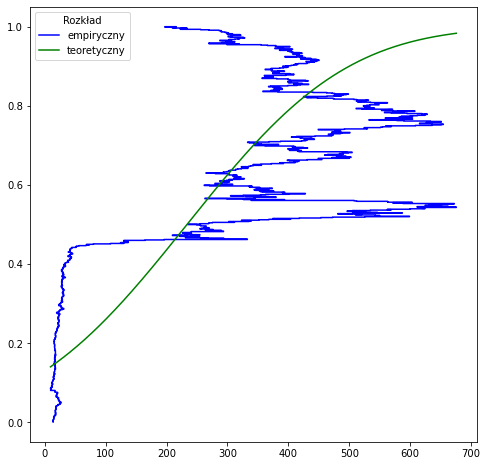

In [77]:
 x = df.Binancecoin
 ecdf = np.arange(1, len(x) + 1, 1)/len(x)
 plt.figure(figsize = (8, 8))
 plt.step(x, ecdf, color = "blue", label = "empiryczny")
 teoretyczny = st.norm(loc = np.mean(x), scale = np.std(x))
 t = np.linspace(min(x), max(x), 500)
 plt.plot(t, teoretyczny.cdf(t), color = "green", label = "teoretyczny")

 plt.legend(title = "Rozkład")
 plt.show()


In [78]:
#Test Shapiro-Wilka
st.shapiro(df.Binancecoin)

ShapiroResult(statistic=0.8461546301841736, pvalue=1.094687385921903e-28)

In [79]:
#Test Kołmogorowa-Smirnova
teoretyczny = st.norm(loc = np.mean(df.Binancecoin), scale = np.std(df.Binancecoin))
st.kstest(df.Binancecoin, teoretyczny.cdf)

KstestResult(statistic=0.258049077082325, pvalue=1.8484135180517455e-53)

In [80]:
#Test Lillieforsa
ssd.lilliefors(df.Binancecoin)

(0.2579161726054845, 0.0009999999999998899)

Tak jak poprzednicy, ***notowania Binancecoin'a nie pochodzą z rozkładu normalnego.***

Pozostał ***Litecoin***

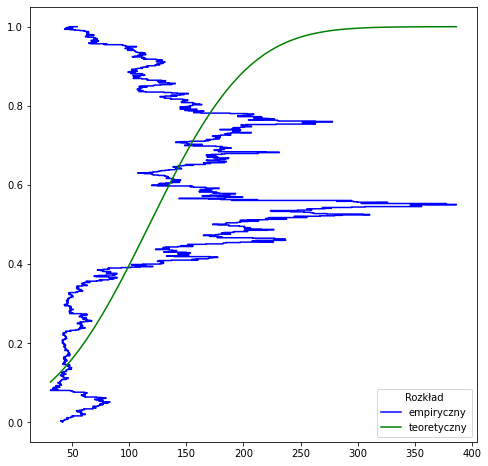

In [81]:
 x = df.Litecoin
 ecdf = np.arange(1, len(x) + 1, 1)/len(x)
 plt.figure(figsize = (8, 8))
 plt.step(x, ecdf, color = "blue", label = "empiryczny")
 teoretyczny = st.norm(loc = np.mean(x), scale = np.std(x))
 t = np.linspace(min(x), max(x), 500)
 plt.plot(t, teoretyczny.cdf(t), color = "green", label = "teoretyczny")

 plt.legend(title = "Rozkład")
 plt.show()


In [82]:
#Test Shapiro-Wilka
st.shapiro(df.Litecoin)

ShapiroResult(statistic=0.9107166528701782, pvalue=1.389453024108446e-22)

In [83]:
#Test Kołmogorowa-Smirnova
teoretyczny = st.norm(loc = np.mean(df.Litecoin), scale = np.std(df.Litecoin))
st.kstest(df.Litecoin, teoretyczny.cdf)

KstestResult(statistic=0.13121977754229475, pvalue=5.294940491736424e-14)

In [84]:
#Test Lillieforsa
ssd.lilliefors(df.Litecoin)

(0.13110374028432925, 0.0009999999999998899)

Tak jak mogliśmy się spodziewać, ***notowania Litecoina również nie pochodzą z rozkładu normalnego.***

# 8. Modele regresji


# 8.1 Model regresji wielorakiej

Sprawdźmy czy i jak cena ***Ethereum*** zależy od pozostałych kryptowalut ze zbioru danych (**BTC, BNB, LTC**).

In [85]:
regresja = smf.ols(formula = "Ethereum ~ Bitcoin + Binancecoin + Litecoin", data = df)
wynik = regresja.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Ethereum   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     5167.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:19:50   Log-Likelihood:                -6498.1
No. Observations:                 902   AIC:                         1.300e+04
Df Residuals:                     898   BIC:                         1.302e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      82.4765     23.539      3.504      0.000      36.278     128.675
Bitcoin         0.0296      0.002     15.980      0.000       0.026       0.033
Binancecoin     5.0701      0.115     44.270      0.000       4.845       5.295
Litecoin       -3.6215      0.361    -10.042      0.000      -4.329      -2.914
==============================================================================
Omnibus:                      252.598   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.760
Skew:                          -1.331   Prob(JB):                    1.49e-186
Kurtosis:                       6.960   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
wynik.pvalues

Intercept       4.813108e-04
Bitcoin         8.937737e-51
Binancecoin    5.815166e-228
Litecoin        1.467947e-22
dtype: float64

Powyższe wartości p dla testu badającego istotność statystyczną współczynników modelu, pozwalają wyciągnąć wniosek:

Każdy z współczynników **jest istotny statystycznie**, co oznacza, że każda z pozostałych kryptowalut może objaśniać.

Skoro tak, możemy przejść do interpretacji pozostałych parametrów modelu.

In [87]:
Współczynnik determinacji **$R^2$ = 0.947** oznacza precyzyjne dopasowanie modelu do danych empirycznych. Mówiąc wprost - model wyjaśnia ponad ***90% zmienności ETH***.


SyntaxError: invalid syntax (3446531836.py, line 1)

# Założenia modelu

Sprawdźmy czy spełnione zostały założenia modelu.

* $E(\epsilon | x) = 0$

W sytuacji gdy budujemy model regresji liniowej z wyrazem wolnym (bo jest możliwość budowania modelu bez wyrazu wolnego ), to metoda najmniejszych kwadratów zapewnia nam, że średnia arytmetyczna reszt jest równa zero. To powoduje, że założenie  jest automatycznie spełnione.


* Normalność reszt

W celu zbadania czy reszty maja rozkład normalny przeprowadzimy dwa testy statystyczne - Snapiro Wilka i Lillieforsa. Zanim to, zerknijmy na histogram.

(array([  1.,   0.,   3.,   5.,   8.,  12.,  14.,  42.,  22.,  53., 419.,
        142., 113.,  55.,  13.]),
 array([-1863.83447125, -1688.28867268, -1512.74287411, -1337.19707554,
        -1161.65127697,  -986.10547839,  -810.55967982,  -635.01388125,
         -459.46808268,  -283.92228411,  -108.37648554,    67.16931304,
          242.71511161,   418.26091018,   593.80670875,   769.35250732]),
 <BarContainer object of 15 artists>)

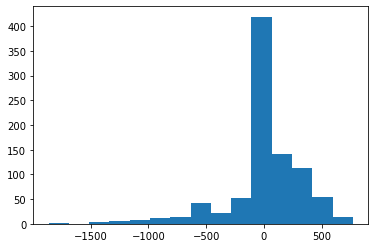

In [88]:
plt.hist(wynik.resid, bins = 15)

In [89]:
#Test Shapiro-Wilka
st.shapiro(wynik.resid)

ShapiroResult(statistic=0.8837708234786987, pvalue=1.9105281747698942e-25)

In [90]:
#Test Lillieforsa
ssd.lilliefors(wynik.resid)

(0.20848804200814547, 0.0009999999999998899)

Wniosek jest oczywisty - **reszty nie mają rozkładu normalnego.**

* $Var(\epsilon | x) = \sigma^2$ (jednorodność wariancji)

W celu zbadania jednorodności wariancji wykonamy test ***Breusch'a Pagan'a***.

In [91]:
test = sms.het_breuschpagan(wynik.resid, wynik.model.exog)
test # p =  9.674730128615546e-54 

(241.00448326916876,
 5.771450271002829e-52,
 109.13943211299387,
 2.98582821510538e-60)

*p-value = 9.674730128615546e-54* świadczy o ***niejednorodności (heteroskedastyczności reszt) wariancji.***

* $Cov(\epsilon_i, \epsilon_j | x) = 0 $ (autokorelacja reszt)
Przeprowadzony test ***Durbin'a Watson'a*** zwracający p-value = 0.054 świadczy, że na poziomie istotności $\alpha = 0.05$ należy stwierdzić, że reszty są ze sobą skorelowane.


* Liniowa zależność

Testy RESET i Harvey'a-Collier'a zweryfikują, czy istnieje liniowa zależność w modelu.

In [92]:
#Test Harveya-Colliera 
ssd.linear_harvey_collier(wynik)

Ttest_1sampResult(statistic=11.817414629845139, pvalue=4.694809183033085e-30)

In [93]:
#Test Reset
ssd.linear_reset(wynik)

D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=37.573751387023194, p-value=6.933676163218796e-09, df_denom=2>

Według powyższych testów miedzy zmiennymi **nie występuje zależność liniowa.**

Podsumowując:

Zbudowany model regresji wielorakiej okazuje się nie spełniać wszystkich założeń. Świadczy to o tym, że objaśnianie jednej kryprowaluty za pomocą innych jest nieefektywne.

Spróbujmy więc zbudować model regresji prostej. 


# 8.1 Model regresji prostej
Niech zmienną zależną będzie ***Bitcoin*** a niezależną ***Ethereum***.

In [94]:
regresja = smf.ols(formula = "Bitcoin ~ Ethereum", data = df)
wynik = regresja.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3923.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:19:51   Log-Likelihood:                -9373.2
No. Observations:                 902   AIC:                         1.875e+04
Df Residuals:                     900   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.012e+04    422.749     23.945      0.000    9293.143     1.1e+04
Ethereum      11.8357      0.189     62.630      0.000      11.465      12.207
==============================================================================
Omnibus:                      347.569   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.063
Skew:                           1.997   Prob(JB):                    1.26e-219
Kurtosis:                       6.297   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretacja modelu

## $R^2$ oraz parametry strukturalne i ich istotność

$R^2$ czyli współczynnik determinacji na poziomie **0.813** oznacza, że ***81**% zmienności **BTC**jest wyjaśniane przez model

In [95]:
wynik.params

Intercept    10122.831320
Ethereum        11.835698
dtype: float64

In [96]:
wynik.pvalues

Intercept    1.981731e-98
Ethereum     0.000000e+00
dtype: float64

Współczynnik przy ***ETH***  oznacza to, że  wzrost ceny tej kryptowaluty o 11.82 powoduje wzrost ***Bitcoin'a*** o 1.

p-value niskie, stąd wniosek:

*Ethereum istotnie wpływa na Bitcoin.*

# 

# Sprawdzenie założeń modelu

# Normalność reszt

(array([ 10.,  30., 165., 395., 107.,  42.,  26.,  21.,  15.,  17.,  10.,
         13.,  13.,  24.,  14.]),
 array([-12160.93502063,  -9460.85543694,  -6760.77585324,  -4060.69626954,
         -1360.61668584,   1339.46289786,   4039.54248156,   6739.62206526,
          9439.70164896,  12139.78123266,  14839.86081636,  17539.94040006,
         20240.01998375,  22940.09956745,  25640.17915115,  28340.25873485]),
 <BarContainer object of 15 artists>)

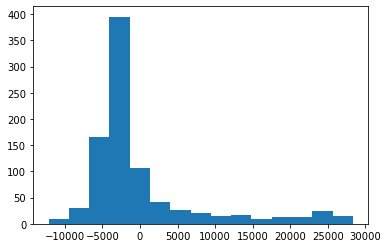

In [97]:
plt.hist(wynik.resid, bins = 15)

In [98]:
#Test Shapiro-Wilka
st.shapiro(wynik.resid)

ShapiroResult(statistic=0.7213895320892334, pvalue=3.107911927739827e-36)

Tak jak poprzednio, tym razem reszty też nie mają rozkładu normalnego.

# Autokorelacja reszt
p - value przy teście Durbina-Watsona na poziomie 0.013 oznacza ***brak skorelowania reszt.***

# Jednorodność wariancji

In [99]:
test = sms.het_breuschpagan(wynik.resid, wynik.model.exog)
test # p = 0.1294 - brak podstaw do odrzucenia hipotezy o jednorodności wariancji

(2.4829135443715025,
 0.11508888105906015,
 2.4842465180282653,
 0.1153428243582759)

# Liniowa zależność

In [100]:
#Test Harveya-Colliera 
ssd.linear_harvey_collier(wynik)
#  pvalue=4.983970886948758e-61 
# Liniowa zależność pomiędzy zmiennymi nie występuje.

Ttest_1sampResult(statistic=-17.905215782334178, pvalue=1.5265743914186455e-61)